---
---

<span style='color:brown'>
    
# PROJECT: Predicting Housing Prices in King County 


---

<span style='color:blue'>

$\LARGE \text{Dataset}$

</span>

We will use the **King County House Sales dataset**:  
[House Sales Prediction (Kaggle)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

Contains information on **21,613 house sales** in King County, Washington (*includes Seattle*).
- `Features include:`
  - Square footage of living space and lot
  - Number of bedrooms and bathrooms
  - Floors, waterfront view, condition, grade
  - Year built and year renovated
  - Geographic location (latitude, longitude, zip code)
- `Target variable:` **Sale Price**



---

<span style='color:blue'>

$\LARGE \text{Project Goal}$

</span>

- Build regression models to **predict housing prices** based on property features.
- Compare **Linear Regression, Ridge Regression, and Lasso Regression**.
- Evaluate models using metrics:
  - **R²** (variance explained)
  - **MAE** (mean absolute error)
  - **RMSE** (root mean squared error)


---

<span style='color:blue'>

$\LARGE \text{Why This Matters}$

</span>

- Housing prices are influenced by many factors: size, location, condition, and more.
- Regression helps us **quantify relationships** and make predictions.
- This project connects data science techniques to a **real-world problem** in economics and urban planning.


---

<span style='color:blue'>
    
$\LARGE \text{Deliverables}$

</span>

1. **Data Exploration**  
   - Summary statistics, distributions, correlations.
2. **Model Building**  
   - Fit Linear, Ridge, and Lasso regression models.
3. **Model Evaluation**  
   - Report R², MAE, RMSE for each model.
   - Interpret coefficients (*which features matter most*).
4. **Reflection**  
   - Discuss overfitting, regularization, and practical insights.
  

---

<span style='color:blue'>

$\LARGE \text{Key Takeaway}$

</span>

By the end of this project:
- Understand how regression applies to real-world housing data.
- Gain hands-on experience with **model building and evaluation**.
- Be able to explain trade-offs between different regression approaches.

---

---
---

<span style='color:brown'>

# 1. Setup

In [1]:
# EDA Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Confirmation Message
print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [2]:
# Settings for Visualizations
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Setting the max number of columns  and rows for the DataFrames
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 50)

# Confirmation Message
print("✓ The Notebook has been successfully configured!")

✓ The Notebook has been successfully configured!


---

<span style='color:brown'>

## 1.1. Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('dataset/kc_house_data.csv')

df_dim = df.shape
print('-'*60)
print(f" - This dataset has a total of {df_dim[0]} rows and {df_dim[1]} columns")
print('-'*60)

------------------------------------------------------------
 - This dataset has a total of 21613 rows and 21 columns
------------------------------------------------------------


In [4]:
# Take a look at the characteristics of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Now the first rows of the DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
---

<span style='color:brown'>

# 2. Exploratory Data Analysis (EDA)

---

<span style='color:brown'>

## 2.2. Data Cleaning



<span style='color:brown'>

### 2.2.1. Null Values and Duplicates

In [6]:
# Let's find out if this dataset has null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# Now let's ckeck if there are duplicates
df[df.duplicated() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - This dataset has **No Null Values.**

 - This dataset has **No duplicated rows**.

</div>

---



<span style='color:brown'>

### 2.2.2. Drop `id` Column

In [8]:
# Since the "id" columns has no relevant value for predicting the price I will drop it.
df.drop(labels='id', axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - This column has been removed as it will not contribute to the training of the regression models.

</div>

---


<span style='color:brown'>

### 2.2.3. Working with the column `date`

In [9]:
# Convert the "date" column as a "datetime"
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S', errors='coerce')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# I will create a new column for the year of sale
df['sale_year'] = df['date'].dt.year

# I will also create a new column for the month of sale
df['sale_month'] = df['date'].dt.month

# Finally because of the two new columns. 
# I will remove the "date" column, since it won't be useful during the training model.
df.drop(labels='date', axis=1, inplace=True)

# Now we'll see how the dataframe has been updated
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - I have decided to create the `sale_month` and `sale_year` columns, based on the information of the original `date` column. I consider that this way this information might be more useful for the project than before.

 - I've decided to remove the `date` column, as the regression model might get confused when trying to work with this column; Nevertheless to avoid lossing this information we already have the new `sale_month` and `sale_year` columns.

</div>

---


<span style='color:brown'>

### 2.2.4. Taking a Quick Look at the Statistics of the Dataframe

In [11]:
# Let's take a look a the stats of the dataset
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,2014.32,6.57
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.47,3.12
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00,1.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,2014.00,4.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,2014.00,6.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,2015.00,9.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,2015.00,12.00


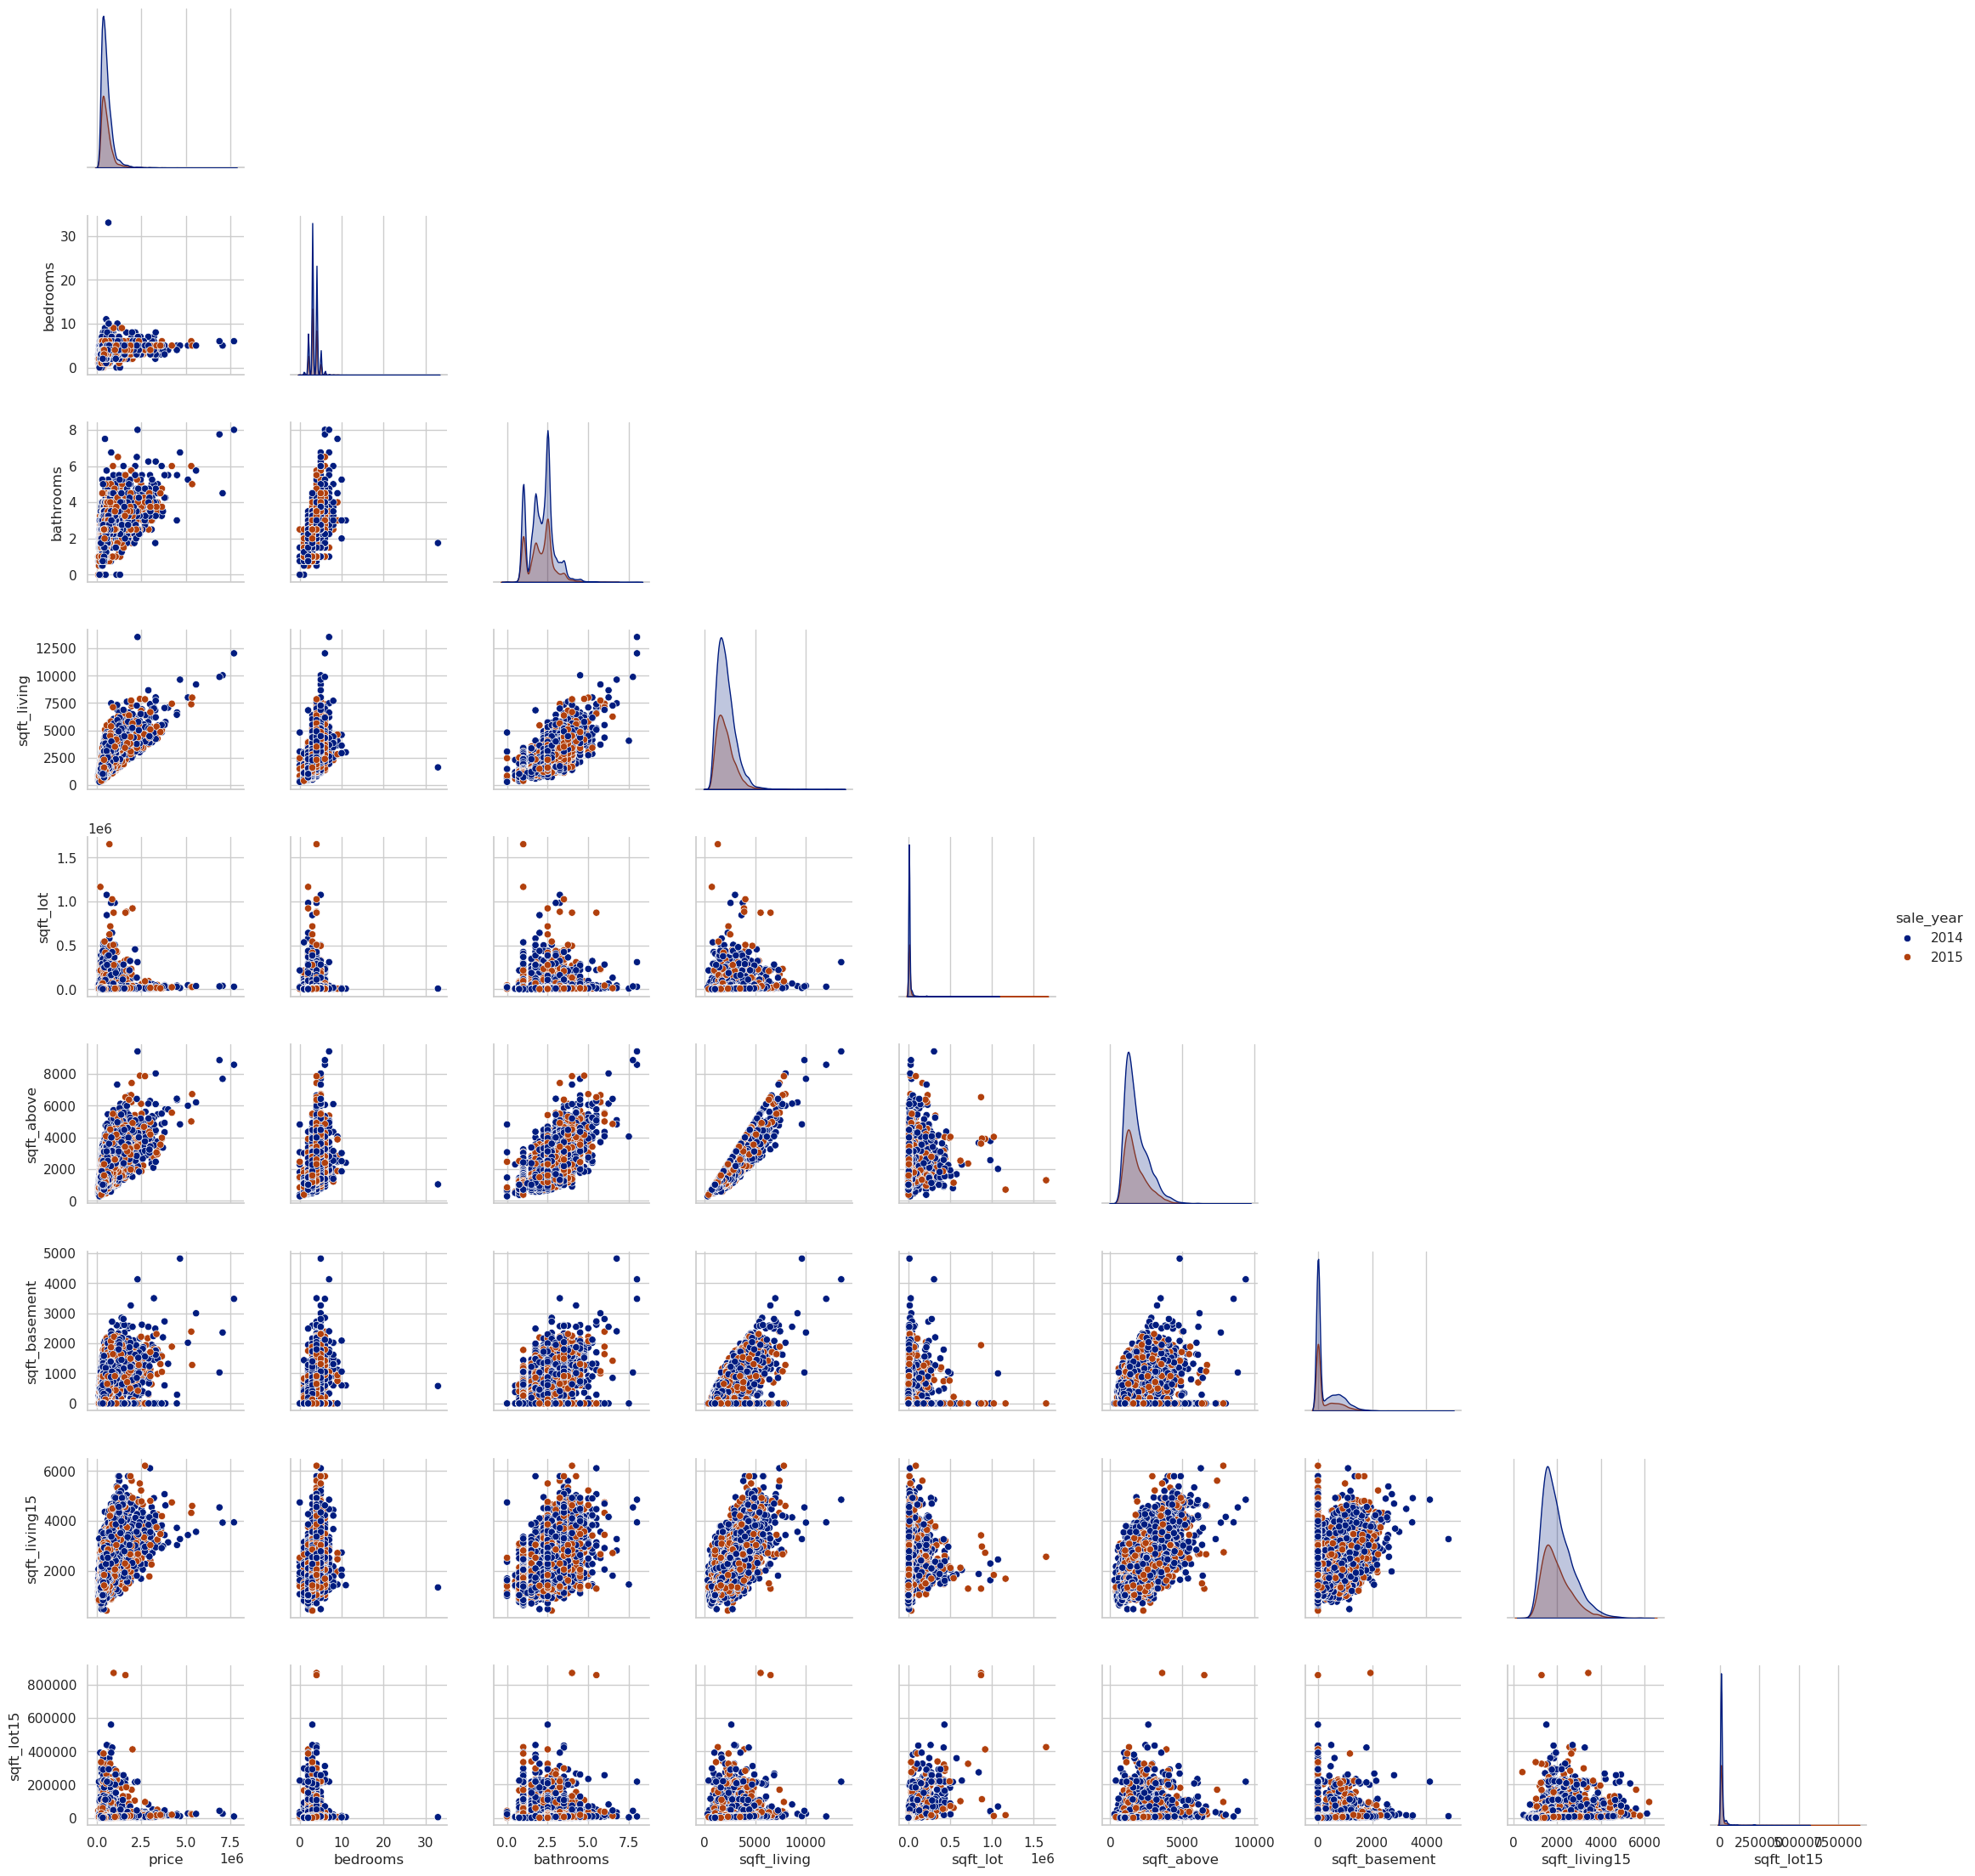

In [12]:
check_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'sale_year']

sns.pairplot(data=df[check_features], diag_kind='kde', corner=True, palette='dark', hue='sale_year')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - There is an Outlier of 33 in the Feature `bedrooms`. I will try to identify if this is a typographical mistake or not.

</div>

---

In [13]:
# Let's see the values of the features for the outlier of 33 bedrooms...
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,6


In [14]:
# Now let's look at the rest of the 3-bedroom houses. perhaps this error is a typographical mistake
df[df['bedrooms'] == 3].sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
6790,539000.0,3,2.00,2070,9195,1.0,0,0,3,8,1220,850,1982,0,98074,47.6491,-122.061,2080,9551,2014,12
5294,335000.0,3,1.75,1270,4800,1.0,0,0,3,7,1270,0,1953,0,98117,47.6930,-122.361,1490,4800,2014,9
21270,389950.0,3,2.25,1580,920,3.0,0,0,3,8,1580,0,2015,0,98106,47.5578,-122.363,1250,1150,2015,4
14508,239900.0,3,2.00,1410,7566,1.0,0,0,3,7,1410,0,1985,0,98030,47.3674,-122.182,1570,7210,2014,5
17930,1350000.0,3,2.00,2070,9600,1.0,0,1,3,7,1590,480,1946,0,98039,47.6160,-122.239,3000,16215,2014,8
1845,380000.0,3,2.00,1840,8580,1.0,0,0,3,8,1840,0,1990,0,98058,47.4626,-122.132,2190,8580,2014,8
16475,431000.0,3,1.00,1500,6240,1.0,0,0,4,7,1500,0,1953,0,98125,47.7281,-122.311,1230,6240,2015,3
14016,255000.0,3,1.00,1160,8636,1.0,0,0,3,6,1160,0,1923,0,98146,47.5097,-122.357,1300,8636,2014,9
2159,455000.0,3,1.00,2400,17239,1.0,0,0,4,7,1890,510,1940,0,98028,47.7500,-122.245,2390,7350,2015,4
294,550000.0,3,2.00,1970,4166,2.0,0,3,5,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166,2014,7


In [15]:
# I could confirm that this value is due to a typygraphical mistake, 
# we'll change 33 for 3 bedrooms.
df.iloc[15870,1] = 3

df.iloc[[15869, 15870, 15871], :]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
15869,362000.0,3,2.50,2310,7485,2.0,0,0,3,8,2310,0,1986,0,98058,47.4390,-122.135,2310,8142,2014,11
15870,640000.0,3,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,6
15871,172500.0,3,1.00,1140,8800,1.0,0,0,3,7,1140,0,1972,0,98001,47.2629,-122.275,1270,13560,2014,5


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - Upon reviewing the summary of scatter plots (*pairplot graph*), I noticed that the feature `bedrooms` had a house of 33 rooms in the row number 15870 (*an Outlier*). However, after comparing these row values with the 3-bedrooms houses values, I concluded that this was a typographical error. Therefore I changed the value of 33 bedrooms in row 15870 to that of a 3-bedroom house.

</div>

---

---

<span style='color:brown'>

## 2.3. Distribution of the Target Variable `price`

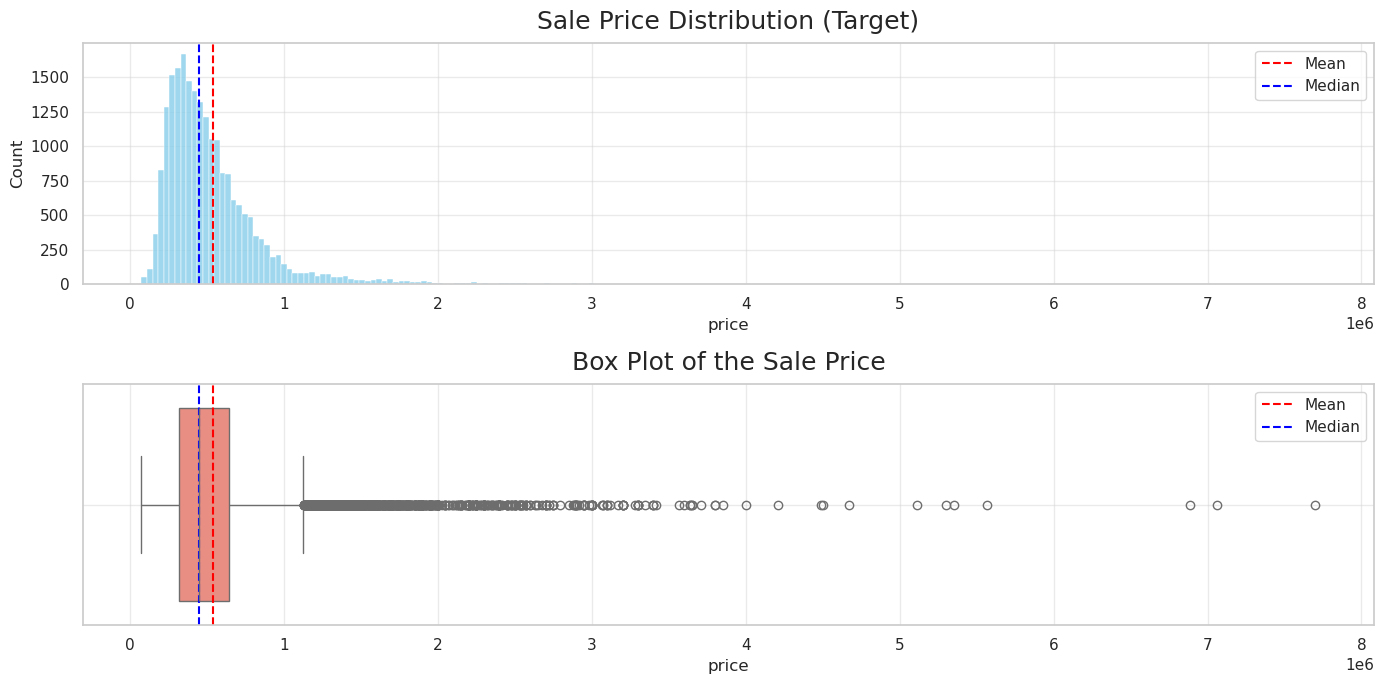

In [16]:
# Visualization of the Target Distribution
fig, axes = plt.subplots(2, 1, figsize=(14, 7))

# Histogram
sns.histplot(data=df, x='price', bins=210, alpha=0.8, ax=axes[0], color='skyblue')
axes[0].set_title('Sale Price Distribution (Target)', fontsize=18, pad=10)
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['price'].median(), color='blue', linestyle='--', label='Median')
axes[0].legend()
axes[0].grid(alpha=0.4)

# Boxplot
sns.boxplot(data=df, x='price', color='salmon')
axes[1].set_title('Box Plot of the Sale Price', fontsize=18, pad=10)
axes[1].axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
axes[1].axvline(df['price'].median(), color='blue', linestyle='--', label='Median')
axes[1].legend()
axes[1].grid(alpha=0.4)

plt.tight_layout()
plt.show()

In [17]:
# Let's check how skewed is the Target
print('-'*90)
print(f' - The Skewness of the target-variable Price is:   {df['price'].skew():.3f} - (Positive and Extremely Skewed)')
print('-'*90)

------------------------------------------------------------------------------------------
 - The Skewness of the target-variable Price is:   4.024 - (Positive and Extremely Skewed)
------------------------------------------------------------------------------------------


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - The target "price" exhibits a very pronounced positive skew. This problem could be solved by applying a **`logarithmic transformation`**. **This will be a task to be implemented before training the model.**

</div>

---

---

<span style='color:brown'>

## 2.4. Correlation Analysis

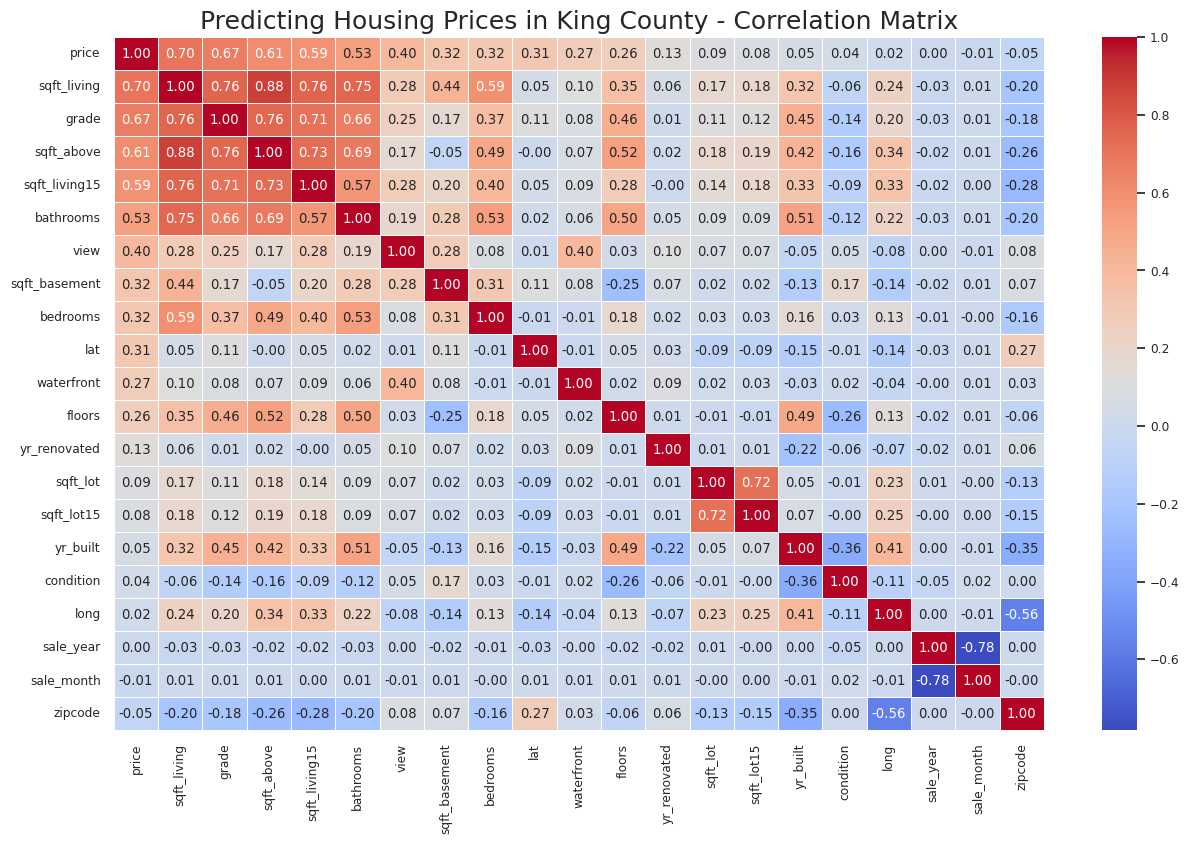

In [18]:
# Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
# -----------------------------------------------------------------------------------------
# Sorting the 'price' column from higher to lower
corr_matrix = corr_matrix.sort_values(by='price', ascending=False)
# Selecting the features correlation (from higher to lower) based on the target
cols = corr_matrix['price'].index
# Correlation Matrix filtered, based on the sorted index
filtered_matrix = corr_matrix[cols]

# -----------------------------------------------------------------------------------------
# Plotting the correlation matrix
plt.figure(figsize=(15, 9))
sns.set(font_scale=0.8)
sns.heatmap(filtered_matrix, cbar=True, annot=True, fmt='.2f', 
            cmap='coolwarm', linewidths=0.5)
plt.title('Predicting Housing Prices in King County - Correlation Matrix', 
          fontsize=18)
plt.show()

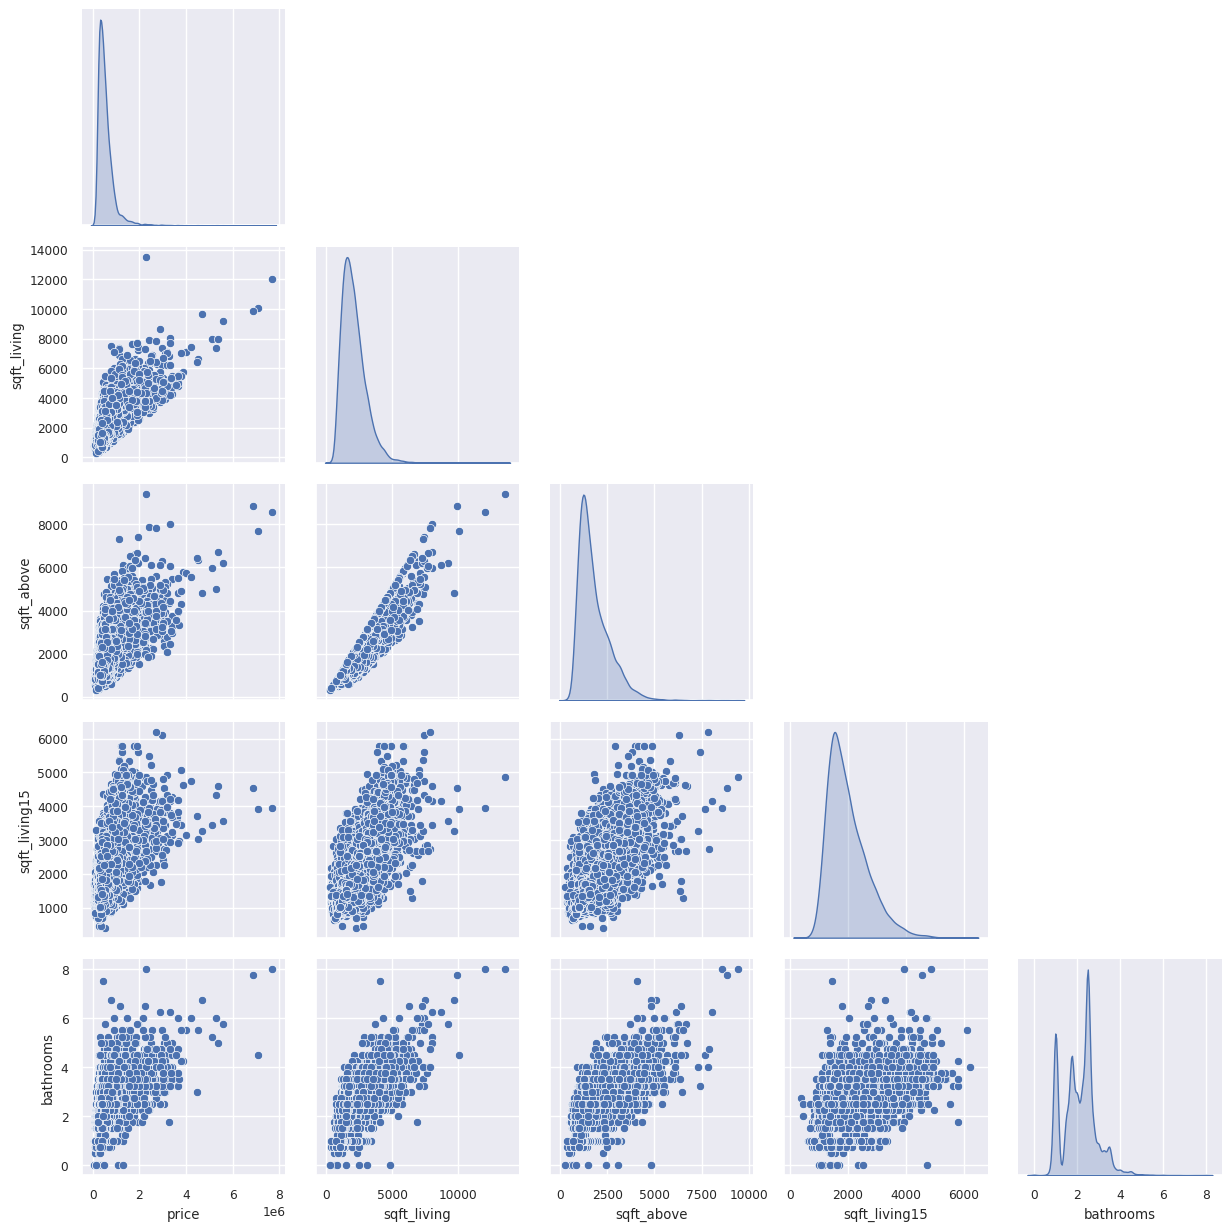

In [19]:
# Now we'll take a look a the most correlatated features with 'price'
check_features = ['price', 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms']

sns.pairplot(data=df[check_features], diag_kind='kde', corner=True)
plt.subplots_adjust(hspace=0.1, wspace=0.15)
plt.show()

---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - From the pairplot diagram above, it can be seen that the features `sqft_living` and `sqft_above` are highly correlated. Therefore, theoretically, **we can omit `sqft_above` without affecting the model during training. This step will be applied in further cells from here**.

</div>

---

---

<span style='color:brown'>

## 2.5. Creating the Dataset for the Model Training

In [20]:
# --- DATASET 1: BASELINE (Raw Price, All Features) ---
X1 = df.drop(columns=['price'])
y1 = df['price']

# --- DATASET 2: LOG-TRANSFORMED TARGET (Log Price, All Features) ---
# Fixing the positive skewness of 'price'
X2 = X1.copy()
y2 = np.log1p(df['price'])

# --- DATASET 3: FEATURE SELECTION + LOG TARGET (Optimized) ---
# Removing 'sqft_above' due to high correlation (0.87) with 'sqft_living' 
# + Fix of the positive skewness of 'price'
X3 = X2.drop(columns=['sqft_above'])
y3 = y2.copy()

In [21]:
# ----------------------------------------------------------------------------------------------------------------
print("\n--- Datasets Ready ---")
print(f"Set 1 (Base): X{X1.shape} | y(target) Skew: {y1.skew():.2f}")
print(f"Set 2 (Log):  X{X2.shape} | y(target) Skew: {y2.skew():.2f} (Skewness fixed!)")
print(f"Set 3 (Opt):  X{X3.shape} | y(target) Skew: {y3.skew():.2f} (Redundant feature removed)")


--- Datasets Ready ---
Set 1 (Base): X(21613, 20) | y(target) Skew: 4.02
Set 2 (Log):  X(21613, 20) | y(target) Skew: 0.43 (Skewness fixed!)
Set 3 (Opt):  X(21613, 19) | y(target) Skew: 0.43 (Redundant feature removed)


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - For the modeling and training of the linear regression machine learning model, I have created three slightly different datasets, because I want to see how much the accuracy or final result of the model improves between each of these datasets.

   -  The 1st group of datasets (X1, y1) is the original dataset with no additional changes.
     
   -  The 2nd group of datasets (X2, y2) has been improved by applying a **logarithmic transformation**, in order to reduce positive skewness.
  
   -  Finally, the 3rd group of datasets (X3, y3) also implemented the **logarithmic transformation**. And the **`sqft_above` feature was removed** because it showed a very strong correlation with the `sqft_living` feature.
  

</div>

---

---

<span style='color:brown'>

## 2.6. Visualizing the Logarithmic Transformation (Target Distribution)

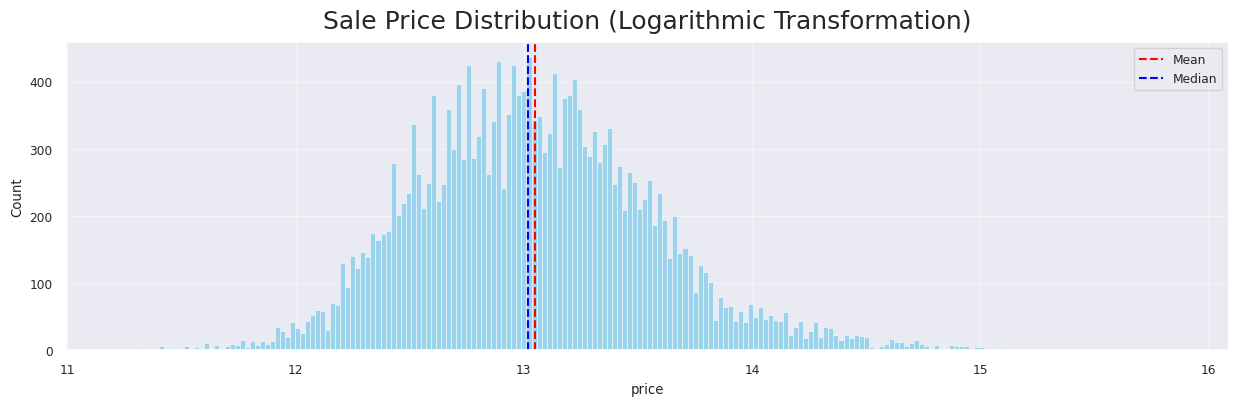

In [22]:
# Histogram
plt.figure(figsize=(15, 4))
sns.histplot(data=y2, bins=210, alpha=0.8, color='skyblue')
plt.title('Sale Price Distribution (Logarithmic Transformation)', 
          fontsize=18, pad=10)
plt.axvline(y2.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(y2.median(), color='blue', linestyle='--', label='Median')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [23]:
# Now let's see the descriptive stats
y2.describe()

count    21613.000000
mean        13.047819
std          0.526683
min         11.225257
25%         12.682155
50%         13.017005
75%         13.377007
max         15.856731
Name: price, dtype: float64

---
---

<span style='color:brown'>

# 3. Feature Engineering

In [24]:
# -----------------------------------------------------------------------
# 1. Organizing the datasets we created in step 
#  2.5 (Creating the Dataset for the Model Training)
# We use a dictionary to process them in a loop.
raw_datasets = {'Exp 1 (Base)': (X1, y1),
                'Exp 2 (Log-Target)': (X2, y2),
                'Exp 3 (Optimized)': (X3, y3)
               }

In [25]:
# -----------------------------------------------------------------------
# 2. Storage dictionary for processed data
processed_data = {}

# --- PREPROCESSING LOOP ---
for name, (X_curr, y_curr) in raw_datasets.items():
    print(f"PROCESSING: {name}...")
    # -------------------------------------------------------------------
    # A) Train/Test Split (80% Training, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(
        X_curr, y_curr, test_size=0.2, random_state=42)

    # -------------------------------------------------------------------
    # B) Feature Scaling (StandardScaler) - 
    # This is ¡CRITICAL for Lasso and Ridge
    # Golden Rule: Fit only in Train to avoid Data Leakage
    scaler = StandardScaler()
    scaler.fit(X_train) # The scaler learns only from the training set

    # We transform both sets with what we learned at Train.
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------------------------------------------------------
    # C) We store the pieces that are ready in our dictionary.
    processed_data[name] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler
    }
    print(f"   -> ✓ Ready. Train shape: {X_train_scaled.shape}   -   Test shape: {X_test_scaled.shape}\n")

print("\n✅ Section Completed: All 3 experiments are ready for modeling.")

PROCESSING: Exp 1 (Base)...
   -> ✓ Ready. Train shape: (17290, 20)   -   Test shape: (4323, 20)

PROCESSING: Exp 2 (Log-Target)...
   -> ✓ Ready. Train shape: (17290, 20)   -   Test shape: (4323, 20)

PROCESSING: Exp 3 (Optimized)...
   -> ✓ Ready. Train shape: (17290, 19)   -   Test shape: (4323, 19)


✅ Section Completed: All 3 experiments are ready for modeling.


---
---

In [26]:
# Now let's take a look at the Scaled data on X_train for the "Exp 1 (Base)" data 
pd.DataFrame(processed_data['Exp 1 (Base)']['X_train']).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.405447,-0.474451,-0.323933,-0.043873,-0.919600,-0.084992,-0.305917,0.909073,1.150243,-0.007257,-0.656310,0.404001,-0.208294,-0.674631,-1.396608,0.442288,1.126073,0.013440,-0.688840,-0.507833
1,-1.512025,-1.452583,-1.183653,-0.285775,-0.919600,-0.084992,-0.305917,-0.625426,-1.413156,-1.200048,-0.200433,-1.430565,-0.208294,0.750604,-0.060172,-0.539958,-1.046523,-0.280662,1.451715,-1.150407
2,-0.405447,-1.452583,-1.095477,-0.188293,0.001545,-0.084992,-0.305917,-0.625426,-1.413156,-0.968792,-0.451165,-0.988910,-0.208294,1.275691,-0.552847,-0.860256,-1.193320,-0.178934,1.451715,-1.471693
3,-0.405447,0.177636,0.017751,-0.187933,-0.919600,-0.084992,-0.305917,0.909073,-0.558690,-0.615824,1.189993,0.200160,-0.208294,-0.880915,-1.193614,0.299934,-0.268498,-0.195283,1.451715,-1.792980
4,-1.512025,0.503680,-0.366919,-0.343991,0.922690,-0.084992,-0.305917,-0.625426,0.295777,-0.413779,0.016109,1.219364,-0.208294,-0.824656,1.040039,0.036578,0.157213,-0.082511,1.451715,-0.829120


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - Please note that the names of the columns has been removed, that's why we have just number from 0 to 19.

</div>

---

---
---

<span style='color:brown'>

# 4. Modeling & Evaluation

In [27]:
# -------------------------------------------------------------------------------------
# 1. Setup Models
# We use CV (Cross-Validation) versions for Ridge & Lasso to auto-tune 'alpha'.
# This handles the scale differences between 'Price' and 'Log-Price' automatically.
models = {'LinearRegression': LinearRegression(),
          'Ridge (Auto-Tuned)': RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0]),
          'Lasso (Auto-Tuned)': LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1.0], 
                                        random_state=42, max_iter=100000, tol=0.001)
          }
# -------------------------------------------------------------------------------------
# 2. Store results here
results_list = []

In [28]:
print('-'*54)
print(" --- Starting Model Training & Evaluation Loop ---")
print('-'*54)

# 3. Main Loop: Iterate through each Dataset (Exp 1, 2, 3)
for dataset_name, data in processed_data.items():
    print(f"Training models on: {dataset_name}...")
    # -------------------------------------------------------------------
    # Extract data parts
    X_train, X_test = data['X_train'], data['X_test']
    y_train, y_test = data['y_train'], data['y_test']

    # -------------------------------------------------------------------
    # Inner Loop: Iterate through each Model
    for model_name, model in models.items():
        # ---------------------------------------------------------------
        # A) Train
        model.fit(X_train, y_train)
        # ---------------------------------------------------------------
        # B) Predict
        y_pred = model.predict(X_test)
        # ---------------------------------------------------------------
        # C) Calculate Metrics (Handling Log-Transformation Logic)
        # CRITICAL STEP: Compare apples to apples (Real Dollars)
        if "Log" in dataset_name or "Optimized" in dataset_name:
            # Reverse Log transform: exp(y) - 1
            y_test_real = np.expm1(y_test)
            y_pred_real = np.expm1(y_pred)
        else:
            # Already in real dollars
            y_test_real = y_test
            y_pred_real = y_pred
        # ---------------------------------------------------------------    
        # Calculate RMSE, MAE (in Dollars) and R2
        rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
        r2 = r2_score(y_test_real, y_pred_real)
        mae = mean_absolute_error(y_test_real, y_pred_real)
        # ---------------------------------------------------------------
        # D) Save results
        results_list.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'R2 Score': r2,
            'RMSE ($ Error)': rmse,
            'MAE ($ Error)': mae
        })

------------------------------------------------------
 --- Starting Model Training & Evaluation Loop ---
------------------------------------------------------
Training models on: Exp 1 (Base)...
Training models on: Exp 2 (Log-Target)...
Training models on: Exp 3 (Optimized)...


In [29]:
# -------------------------------------------------------------------------------------
# 4. Create Comparison DataFrame
results_df = pd.DataFrame(results_list)

# -------------------------------------------------------------------------------------
# 5. Display the Leaderboard sorted by Performance (R2)
print("\n--- 🏆 FINAL LEADERBOARD 🏆 ---")

display(results_df.sort_values(by='R2 Score', ascending=False).style.background_gradient(cmap='Greens', subset=['R2 Score']))


--- 🏆 FINAL LEADERBOARD 🏆 ---


,Dataset,Model,R2 Score,RMSE ($ Error),MAE ($ Error)
0,Exp 1 (Base),LinearRegression,0.702737,211988.663418,127033.971525
2,Exp 1 (Base),Lasso (Auto-Tuned),0.702737,211988.867171,127033.481844
1,Exp 1 (Base),Ridge (Auto-Tuned),0.702562,212051.004835,126824.337886
8,Exp 3 (Optimized),Lasso (Auto-Tuned),0.516641,270319.426628,116721.949954
5,Exp 2 (Log-Target),Lasso (Auto-Tuned),0.516526,270351.677032,116717.785398
7,Exp 3 (Optimized),Ridge (Auto-Tuned),0.509152,272405.492640,116819.013852
3,Exp 2 (Log-Target),LinearRegression,0.508660,272541.954150,116826.166055
6,Exp 3 (Optimized),LinearRegression,0.508660,272541.954150,116826.166055
4,Exp 2 (Log-Target),Ridge (Auto-Tuned),0.508565,272568.471011,116824.136588


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - It's relevant to see that the top three highest R2 scores are have trhe lowest RMSE from the group. But on the other side it has the Highest values of the MAE.

 - **Note 1:** It might be a good idea to work with the `Exp 1 (Base)` dataset and the `LinearRegression Model` for predicting the most expensive houses (wealthy citizens).

 - **Note 2:** On the contrary it might be a good idea to choose the `Exp 2 (Log-Target)` dataset and the `Lasso (Auto Tuned) Model` for predicting the less expensive houses (average citizens).

</div>

---

---
---

<span style='color:brown'>

# 5. Model Interpretation

In [30]:
# ----------------------------------------------------------------------------------
# 1. Retrieve the specific model and its processed data
# Note: We select 'Exp 1 (Base)' and 'Lasso (Auto-Tuned)' specifically to analyze feature selection capabilities.
champion_data = processed_data['Exp 1 (Base)']
champion_model = models['Lasso (Auto-Tuned)']

# I will fit the champion model (Lasso - Auto Tuned) on the training data to ensure coefficients are fresh and accessible
# (This acts as a safety check in case the model object was overwritten in the loop)
champion_model.fit(champion_data['X_train'], champion_data['y_train'])

,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.0001, 0.001, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,100000
,tol,0.001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [31]:
# ----------------------------------------------------------------------------------
# 2. Extract Coefficients
# Exclude the target 'price' if it's still in columns 0, or ensure alignment
feature_names = df.columns[1:] 
coefficients = champion_model.coef_

print("--- 🔍 Extracting Insights from the Champion Model (Exp 1 - Lasso) ---\n")

--- 🔍 Extracting Insights from the Champion Model (Exp 1 - Lasso) ---



In [32]:
# ----------------------------------------------------------------------------------
# 3. Create a DataFrame for visualization
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coeff': abs(coefficients) # Helper column for sorting by magnitude
})

# Sort by absolute importance (Magnitude of impact)
coeff_df = coeff_df.sort_values(by='Abs_Coeff', ascending=False)
coeff_df.head()

,Feature,Coefficient,Abs_Coeff
2,sqft_living,164627.183782,164627.183782
8,grade,110214.395022,110214.395022
14,lat,82624.748614,82624.748614
11,yr_built,-79171.778462,79171.778462
5,waterfront,47348.592441,47348.592441


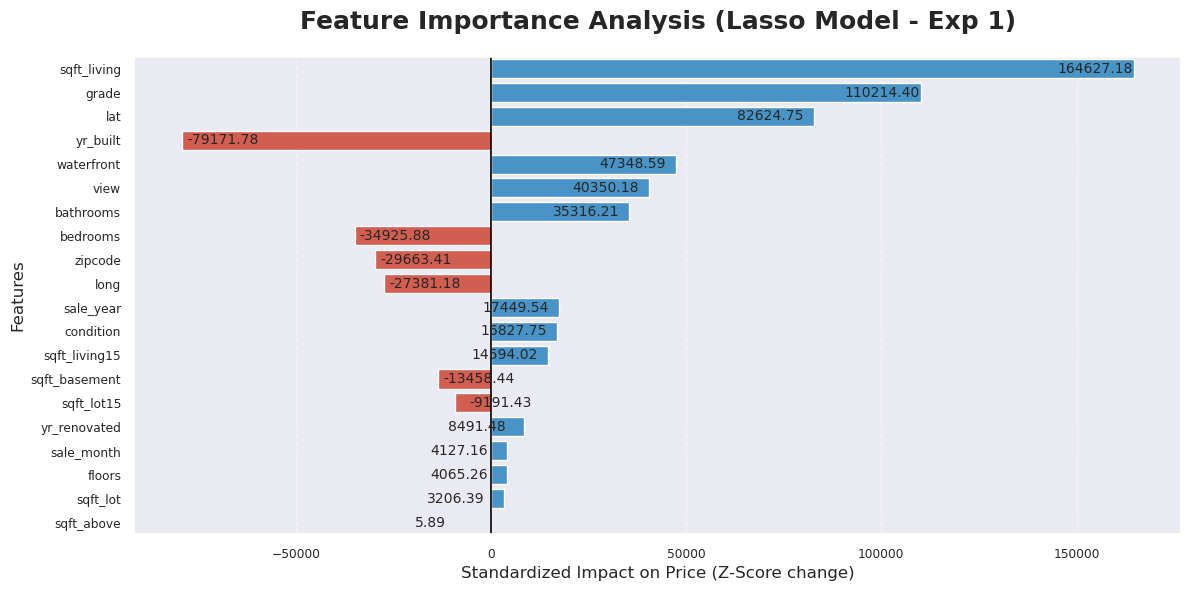

In [33]:
# ----------------------------------------------------------------------------------
# 4. Visualization
plt.figure(figsize=(12, 6))

# Logic for color palette: Red for negative impact, Blue for positive impact
colors = ['#E74C3C' if x < 0 else '#3498DB' for x in coeff_df['Coefficient']]

# Create the Bar Plot
ax = sns.barplot(data=coeff_df, x='Coefficient', y='Feature',
                 palette=colors, hue='Feature', legend=False)

# Add titles and labels
plt.title('Feature Importance Analysis (Lasso Model - Exp 1)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Standardized Impact on Price (Z-Score change)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add a vertical line at 0 for reference
plt.axvline(x=0, color='black', linestyle='-', linewidth=1.2)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add value annotations to the bars (The "Ultra" touch)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=-55, fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
# ----------------------------------------------------------------------------------
# 5. Executive Summary of Insights
print("\n--- 📝 Interpretation Summary ---")
print("Top 10 Most Influential Features:")
display(coeff_df[['Feature', 'Coefficient']].head(10))

# Identify features eliminated by Lasso (Coefficient == 0)
zero_features = coeff_df[coeff_df['Coefficient'] == 0]['Feature'].tolist()



--- 📝 Interpretation Summary ---
Top 10 Most Influential Features:


,Feature,Coefficient
2,sqft_living,164627.183782
8,grade,110214.395022
14,lat,82624.748614
11,yr_built,-79171.778462
5,waterfront,47348.592441
6,view,40350.183947
1,bathrooms,35316.210863
0,bedrooms,-34925.877624
13,zipcode,-29663.409252
15,long,-27381.177395


---
<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations**:

 - **Lasso** kept all features (No coefficients reduced to absolute zero).

 - **Positive (Blue)**: As this feature increases, the house price increases.

 - **Negative (Red)**: As this feature increases, the house price decreases.

 - **Magnitude**: Since data was scaled, larger bars indicate stronger relative importance.

</div>

---

---
---

<span style='color:brown'>

# 6. Final Conclusions & Strategic Recommendations

</span>

## The "Robustness vs. Precision" Trade-off
After rigorously testing three different data strategies (Base, Log-Transformed, and Optimized Feature Selection) across three algorithms (Linear, Lasso, and Ridge), we have arrived at a nuanced conclusion:

* **The Technical Champion:** The **Experiment 1 (Base Dataset) - Linear Regression** achieved the highest explainability with an **$R^2$ of 0.702**. It proved to be the most robust model for capturing the full range of prices, including the extreme luxury segment.

* **The Precision Specialist:** The **Experiment 3 (Optimized) - Lasso** model achieved the lowest **Mean Absolute Error (MAE)** of ~116k. This means that for the "average" house in King County, this model is actually ~10,000 more accurate than the champion, despite having a lower $R^2$.

## Key Technical Insights

* **The Log-Transformation Paradox:** While applying a Log-transformation to the Target (`price`) normalized the distribution and improved median accuracy, it penalized the global metrics ($R^2$ and RMSE) upon re-transformation. Small errors in "Log-scale" became massive errors in "Dollar-scale" when predicting multi-million dollar mansions.

* **Lasso's Feature Selection:** The Lasso algorithm successfully identified and penalized redundant features (multicollinearity), confirming our EDA findings that variables like `sqft_above` were largely redundant when `sqft_living` was present.

## Business Drivers (Feature Importance)

Based on the coefficients of our best models, the value of a property in King County is driven primarily by:

1.  **Grade & Quality:** The construction grade is the single most influential factor. High-quality craftsmanship yields a higher ROI than simply adding more square footage.

2.  **Living Space:** `sqft_living` has a strong positive correlation with price.

3.  **Location (Latitude):** There is a clear "North vs. South" divide. Properties located further North (closer to Seattle/Bellevue hubs) command significantly higher premiums.

4.  **Waterfront:** Despite being a sparse feature (few houses have it), it acts as a massive price multiplier.

## Strategic Recommendation

The choice of the final model depends on the business use case:

* **Use Case A (Luxury Real Estate / Investment):** Deploy **Model Exp 1 (Linear Regression)**. It handles outliers better and minimizes the risk of massively underpricing a luxury estate.

* **Use Case B (High-Volume Mortgage Estimation):** Deploy **Model Exp 3 (Lasso)**. For the vast majority of standard loans, it offers tighter error margins and excludes unnecessary noise.

---
---